In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import split, explode
from pyspark.sql.types import IntegerType

import seaborn as sns
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("Over time comparison").getOrCreate()

# Over time comparison 

Here, I use only AZ data to do some time comparisons. 
We hava data for year: 08, 10, 12, 14, 16, 18

In [3]:
# load AZ data
bucket_dir="gs://pstat135-voter-file/VM2Uniform/"
df = spark.read.parquet(bucket_dir + 'VM2Uniform--AZ--2021-05-20')

In [11]:
# select county and turnout
df_08 = df.select("County",
                  "ElectionReturns_G08CountyTurnoutAllRegisteredVoters").distinct()
df_10 = df.select("County",
                  "ElectionReturns_G10CountyTurnoutAllRegisteredVoters").distinct()
df_12 = df.select("County",
                  "ElectionReturns_G12CountyTurnoutAllRegisteredVoters").distinct()
df_14 = df.select("County",
                  "ElectionReturns_G14CountyTurnoutAllRegisteredVoters").distinct()
df_16 = df.select("County",
                  "ElectionReturns_G16CountyTurnoutAllRegisteredVoters").distinct()
df_18 = df.select("County",
                  "ElectionReturns_G18CountyTurnoutAllRegisteredVoters").distinct()

In [14]:
df_08 = df_08.withColumn("year", lit(2008))
df_10 = df_10.withColumn("year", lit(2010))
df_12 = df_12.withColumn("year", lit(2012))
df_14 = df_14.withColumn("year", lit(2014))
df_16 = df_16.withColumn("year", lit(2016))
df_18 = df_18.withColumn("year", lit(2018))

df_combined = df_08.union(df_10).union(df_12).union(df_14).union(df_16).union(df_18)
df_combined.show()

+----------+---------------------------------------------------+----+
|    County|ElectionReturns_G08CountyTurnoutAllRegisteredVoters|year|
+----------+---------------------------------------------------+----+
|    LA PAZ|                                                58%|2008|
|  MARICOPA|                                                69%|2008|
|    GRAHAM|                                                62%|2008|
|SANTA CRUZ|                                                55%|2008|
|      GILA|                                                62%|2008|
|   YAVAPAI|                                                76%|2008|
|  COCONINO|                                                62%|2008|
|      PIMA|                                                72%|2008|
|    NAVAJO|                                                55%|2008|
|   COCHISE|                                                64%|2008|
|  GREENLEE|                                                63%|2008|
|    MOHAVE|        

In [32]:
# convert turnout rate into integer
df_combined = df_combined.withColumn("ElectionReturns_G08CountyTurnoutAllRegisteredVoters", regexp_replace("ElectionReturns_G08CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType()).alias('turnout'))

In [33]:
import pyspark.sql.functions as F
pivot_data = df_combined.groupBy('year').pivot('County').agg(F.first('ElectionReturns_G08CountyTurnoutAllRegisteredVoters')).sort('year')
pivot_data.show()

+----+------+-------+--------+----+------+--------+------+--------+------+------+----+-----+----------+-------+----+
|year|APACHE|COCHISE|COCONINO|GILA|GRAHAM|GREENLEE|LA PAZ|MARICOPA|MOHAVE|NAVAJO|PIMA|PINAL|SANTA CRUZ|YAVAPAI|YUMA|
+----+------+-------+--------+----+------+--------+------+--------+------+------+----+-----+----------+-------+----+
|2008|    53|     64|      62|  62|    62|      63|    58|      69|    56|    55|  72|   65|        55|     76|  55|
|2010|    43|     52|      47|  55|    48|      53|    46|      49|    43|    43|  56|   46|        42|     60|  39|
|2012|    52|     60|      62|  63|    58|      62|    55|      63|    54|    56|  65|   58|        55|     70|  48|
|2014|    41|     47|      44|  48|    36|      41|    32|      39|    35|    42|  47|   37|        37|     50|  29|
|2016|    54|     60|      64|  64|    60|      66|    52|      66|    57|    59|  69|   58|        58|     74|  51|
|2018|    48|     60|      61|  66|    57|      56|    47|      

In [35]:
# conver it into a Pandas dataframe
pivot_data = pivot_data.toPandas()

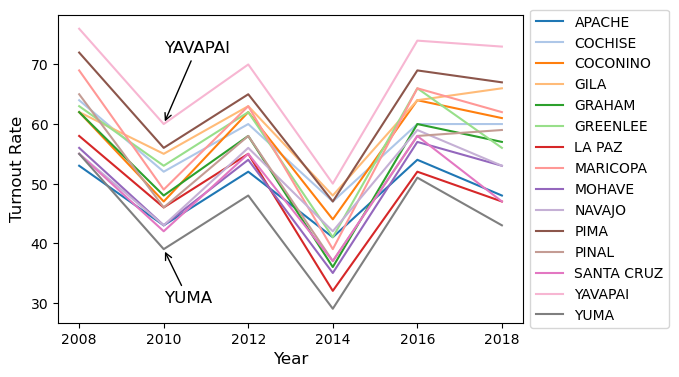

In [55]:
# Define the color map
color_map = plt.cm.tab20

fig, ax = plt.subplots(figsize=(6, 4))

for i, col in enumerate(pivot_data.columns[1:]):
    ax.plot(pivot_data['year'], pivot_data[col], color=color_map(i), label=col)
    
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Turnout Rate', fontsize=12)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.annotate('YAVAPAI', xy=(2010, pivot_data['YAVAPAI'][pivot_data['year'] == 2010]), xytext=(2010, 72),
            arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12)

ax.annotate('YUMA', xy=(2010, pivot_data['YUMA'][pivot_data['year'] == 2010]), xytext=(2010, 30),
            arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12)

fig.savefig('voter_intime.png', dpi=300, bbox_inches='tight')

Compare AZ, MA, and ND

In [4]:
# load MA and ND data
dfma = spark.read.parquet(bucket_dir + 'VM2Uniform--MA--2021-01-19')
dfnd = spark.read.parquet(bucket_dir + 'VM2Uniform--ND--2021-03-18')

In [11]:
# select county and turnout - AZ
df_08 = df.select("County",
                  "ElectionReturns_G08CountyTurnoutAllRegisteredVoters").distinct()
df_10 = df.select("County",
                  "ElectionReturns_G10CountyTurnoutAllRegisteredVoters").distinct()
df_12 = df.select("County",
                  "ElectionReturns_G12CountyTurnoutAllRegisteredVoters").distinct()
df_14 = df.select("County",
                  "ElectionReturns_G14CountyTurnoutAllRegisteredVoters").distinct()
df_16 = df.select("County",
                  "ElectionReturns_G16CountyTurnoutAllRegisteredVoters").distinct()
df_18 = df.select("County",
                  "ElectionReturns_G18CountyTurnoutAllRegisteredVoters").distinct()

df_08 = df.withColumn("ElectionReturns_G08CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G08CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G08CountyTurnoutAllRegisteredVoters").alias('turnout'))
df_10 = df.withColumn("ElectionReturns_G10CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G10CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G10CountyTurnoutAllRegisteredVoters").alias('turnout'))
df_12 = df.withColumn("ElectionReturns_G12CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G12CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G12CountyTurnoutAllRegisteredVoters").alias('turnout'))
df_14 = df.withColumn("ElectionReturns_G14CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G14CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G14CountyTurnoutAllRegisteredVoters").alias('turnout'))
df_16 = df.withColumn("ElectionReturns_G16CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G16CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G16CountyTurnoutAllRegisteredVoters").alias('turnout'))
df_18 = df.withColumn("ElectionReturns_G18CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G18CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G18CountyTurnoutAllRegisteredVoters").alias('turnout'))

In [15]:
# select county and turnout - MA
dfma_08 = dfma.select("County",
                  "ElectionReturns_G08CountyTurnoutAllRegisteredVoters").distinct()
dfma_10 = dfma.select("County",
                  "ElectionReturns_G10CountyTurnoutAllRegisteredVoters").distinct()
dfma_12 = dfma.select("County",
                  "ElectionReturns_G12CountyTurnoutAllRegisteredVoters").distinct()
dfma_14 = dfma.select("County",
                  "ElectionReturns_G14CountyTurnoutAllRegisteredVoters").distinct()
dfma_16 = dfma.select("County",
                  "ElectionReturns_G16CountyTurnoutAllRegisteredVoters").distinct()
dfma_18 = dfma.select("County",
                  "ElectionReturns_G18CountyTurnoutAllRegisteredVoters").distinct()

dfma_08 = dfma.withColumn("ElectionReturns_G08CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G08CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G08CountyTurnoutAllRegisteredVoters").alias('turnout'))
dfma_10 = dfma.withColumn("ElectionReturns_G10CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G10CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G10CountyTurnoutAllRegisteredVoters").alias('turnout'))
dfma_12 = dfma.withColumn("ElectionReturns_G12CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G12CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G12CountyTurnoutAllRegisteredVoters").alias('turnout'))
dfma_14 = dfma.withColumn("ElectionReturns_G14CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G14CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G14CountyTurnoutAllRegisteredVoters").alias('turnout'))
dfma_16 = dfma.withColumn("ElectionReturns_G16CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G16CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G16CountyTurnoutAllRegisteredVoters").alias('turnout'))
dfma_18 = dfma.withColumn("ElectionReturns_G18CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G18CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G18CountyTurnoutAllRegisteredVoters").alias('turnout'))

In [16]:
# select county and turnout - ND
dfnd_08 = dfnd.select("County",
                  "ElectionReturns_G08CountyTurnoutAllRegisteredVoters").distinct()
dfnd_10 = dfnd.select("County",
                  "ElectionReturns_G10CountyTurnoutAllRegisteredVoters").distinct()
dfnd_12 = dfnd.select("County",
                  "ElectionReturns_G12CountyTurnoutAllRegisteredVoters").distinct()
dfnd_14 = dfnd.select("County",
                  "ElectionReturns_G14CountyTurnoutAllRegisteredVoters").distinct()
dfnd_16 = dfnd.select("County",
                  "ElectionReturns_G16CountyTurnoutAllRegisteredVoters").distinct()
dfnd_18 = dfnd.select("County",
                  "ElectionReturns_G18CountyTurnoutAllRegisteredVoters").distinct()

dfnd_08 = dfnd.withColumn("ElectionReturns_G08CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G08CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G08CountyTurnoutAllRegisteredVoters").alias('turnout'))
dfnd_10 = dfnd.withColumn("ElectionReturns_G10CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G10CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G10CountyTurnoutAllRegisteredVoters").alias('turnout'))
dfnd_12 = dfnd.withColumn("ElectionReturns_G12CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G12CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G12CountyTurnoutAllRegisteredVoters").alias('turnout'))
dfnd_14 = dfnd.withColumn("ElectionReturns_G14CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G14CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G14CountyTurnoutAllRegisteredVoters").alias('turnout'))
dfnd_16 = dfnd.withColumn("ElectionReturns_G16CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G16CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G16CountyTurnoutAllRegisteredVoters").alias('turnout'))
dfnd_18 = dfnd.withColumn("ElectionReturns_G18CountyTurnoutAllRegisteredVoters",regexp_replace("ElectionReturns_G18CountyTurnoutAllRegisteredVoters", "%", "").cast(IntegerType())).agg(avg("ElectionReturns_G18CountyTurnoutAllRegisteredVoters").alias('turnout'))

In [17]:
df_08 = df_08.withColumn("year", lit(2008))
df_10 = df_10.withColumn("year", lit(2010))
df_12 = df_12.withColumn("year", lit(2012))
df_14 = df_14.withColumn("year", lit(2014))
df_16 = df_16.withColumn("year", lit(2016))
df_18 = df_18.withColumn("year", lit(2018))

df_combined = df_08.union(df_10).union(df_12).union(df_14).union(df_16).union(df_18)

In [19]:
dfma_08 = dfma_08.withColumn("year", lit(2008))
dfma_10 = dfma_10.withColumn("year", lit(2010))
dfma_12 = dfma_12.withColumn("year", lit(2012))
dfma_14 = dfma_14.withColumn("year", lit(2014))
dfma_16 = dfma_16.withColumn("year", lit(2016))
dfma_18 = dfma_18.withColumn("year", lit(2018))

dfma_combined = dfma_08.union(dfma_10).union(dfma_12).union(dfma_14).union(dfma_16).union(dfma_18)

In [20]:
dfnd_08 = dfnd_08.withColumn("year", lit(2008))
dfnd_10 = dfnd_10.withColumn("year", lit(2010))
dfnd_12 = dfnd_12.withColumn("year", lit(2012))
dfnd_14 = dfnd_14.withColumn("year", lit(2014))
dfnd_16 = dfnd_16.withColumn("year", lit(2016))
dfnd_18 = dfnd_18.withColumn("year", lit(2018))

dfnd_combined = dfnd_08.union(dfnd_10).union(dfnd_12).union(dfnd_14).union(dfnd_16).union(dfnd_18)

In [26]:
df_combined = df_combined.withColumn("state", lit("Arizona"))
dfma_combined = dfma_combined.withColumn("state", lit("Massachusetts"))
dfnd_combined = dfnd_combined.withColumn("state", lit("NorthDakota"))

df_state_combined = df_combined.union(dfma_combined).union(dfnd_combined)

In [27]:
df_state_combined.show()

+------------------+----+-------------+
|           turnout|year|        state|
+------------------+----+-------------+
| 67.87103858053628|2008|      Arizona|
|49.730933105194076|2010|      Arizona|
|62.222792283892744|2012|      Arizona|
| 40.52782931745734|2014|      Arizona|
| 65.12094646540409|2016|      Arizona|
| 61.76668901181324|2018|      Arizona|
| 73.67958458999279|2008|Massachusetts|
|55.308957912487735|2010|Massachusetts|
| 73.35811027286431|2012|Massachusetts|
|50.950049850862925|2014|Massachusetts|
| 74.51338165991235|2016|Massachusetts|
|  64.0025617591942|2018|Massachusetts|
| 49.25707560560182|2008|  NorthDakota|
|35.988808194549584|2010|  NorthDakota|
|47.105888058289175|2012|  NorthDakota|
|  35.2509178652536|2014|  NorthDakota|
| 46.87822435654807|2016|  NorthDakota|
|  83.2460281037093|2018|  NorthDakota|
+------------------+----+-------------+



In [28]:
import pyspark.sql.functions as F
pivot_data_state = df_state_combined.groupBy('year').pivot('state').agg(F.first('turnout')).sort('year')
pivot_data_state.show()

+----+------------------+------------------+------------------+
|year|           Arizona|     Massachusetts|       NorthDakota|
+----+------------------+------------------+------------------+
|2008| 67.87103858053628| 73.67958458999279| 49.25707560560182|
|2010|49.730933105194076|55.308957912487735|35.988808194549584|
|2012|62.222792283892744| 73.35811027286431|47.105888058289175|
|2014| 40.52782931745734|50.950049850862925|  35.2509178652536|
|2016| 65.12094646540409| 74.51338165991235| 46.87822435654807|
|2018| 61.76668901181324|  64.0025617591942|  83.2460281037093|
+----+------------------+------------------+------------------+



In [ ]:
# conver it into a Pandas dataframe
pivot_data_state = pivot_data_state.toPandas()

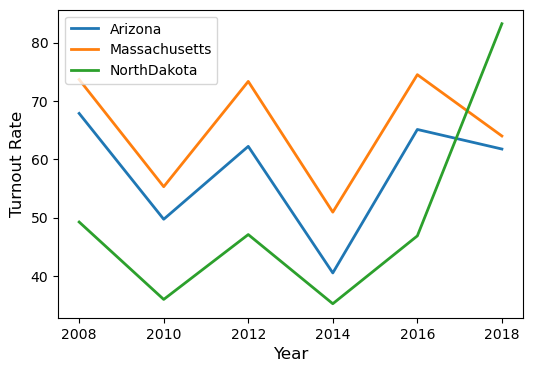

In [34]:
# plot

fig, ax = plt.subplots(figsize=(6, 4))

for col in pivot_data_state.columns[1:]:
    ax.plot(pivot_data_state['year'], pivot_data_state[col], label=col, linewidth=2)
    
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Turnout Rate', fontsize=12)
ax.legend(loc='upper left')

fig.savefig('voter_state_intime.png', dpi=300, bbox_inches='tight')